In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Load the CSV file into a DataFrame
csv_filename = 'Step1output.csv'
df = pd.read_csv(csv_filename)

print(df.columns)
print(df.info())
df

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                  

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


# Encoding

In [3]:
from sklearn.preprocessing import OneHotEncoder

# Nominal columns for one-hot encoding 
nominal_cols = ['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']
nominal_data = df[nominal_cols]

# OneHotEncoding - Fit and transform on the nominal data
encoder = OneHotEncoder()
encoded_nominal = encoder.fit_transform(nominal_data)

# Encoded nominal features with appropriate names
encoded_nominal_cols = encoder.get_feature_names_out(input_features=nominal_cols)
df_nominal_encoded = pd.DataFrame(encoded_nominal.toarray(), columns=encoded_nominal_cols)

df_nominal_encoded

,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [4]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal columns with their ordered ranking
ordinal_cols = {
    'credit_history': ['critical', 'poor', 'good', 'very good', 'perfect'],
    'employment_duration': ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '> 7 years']
}

# DataFrame for the ordinal columns
df_ordinal = df[list(ordinal_cols.keys())]

# OrdinalEncoder with specified ordered levels
ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols[col] for col in df_ordinal.columns])

# Fit and transform the ordinal data using the encoder
df_ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_ordinal), columns=df_ordinal.columns)

# Adding a suffix to the original column names
encoded_ordinal_suffix = "_encoded"
df_ordinal_encoded.columns = [f"{col}{encoded_ordinal_suffix}" for col in df_ordinal_encoded.columns]

df_ordinal_encoded

,credit_history_encoded,employment_duration_encoded
0,0.0,4.0
1,2.0,2.0
2,0.0,3.0
3,2.0,3.0
4,1.0,2.0
...,...,...
995,2.0,3.0
996,2.0,2.0
997,2.0,4.0
998,2.0,2.0


In [5]:
# Final dataframe (encoded Categorical variables + available numerical variables)
df_final = pd.concat([df, df_nominal_encoded, df_ordinal_encoded], axis=1)

# Drop the original nominal and ordinal columns
df_final.drop(columns=list(nominal_cols) + list(ordinal_cols.keys()), inplace=True)

# In the 'default' target column, map 'no' to 0 and 'yes' to 1
df_final['default'] = df_final['default'].map({'no': 0, 'yes': 1})

pd.set_option('display.max_columns', None)
print(df_final.columns)
print(df_final.info())
df_final

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'default', 'checking_balance_1 - 200 DM', 'checking_balance_< 0 DM',
       'checking_balance_> 200 DM', 'checking_balance_unknown',
       'purpose_business', 'purpose_car', 'purpose_education',
       'purpose_furniture/appliances', 'purpose_renovations',
       'savings_balance_100 - 500 DM', 'savings_balance_500 - 1000 DM',
       'savings_balance_< 100 DM', 'savings_balance_> 1000 DM',
       'savings_balance_unknown', 'other_credit_bank', 'other_credit_none',
       'other_credit_store', 'housing_other', 'housing_own', 'housing_rent',
       'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled',
       'phone_no', 'phone_yes', 'credit_history_encoded',
       'employment_duration_encoded'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Colum

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,credit_history_encoded,employment_duration_encoded
0,6,1169,4,4,67,2,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
1,48,5951,2,2,22,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0
2,12,2096,2,3,49,1,2,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
3,42,7882,2,4,45,1,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0
4,24,4870,3,4,53,2,2,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0
996,30,3857,4,4,40,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
997,12,804,4,4,38,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,4.0
998,45,1845,4,4,23,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0


# Predictor Response, Train Test Split, & Standard Scaling

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate predictors and target
X = df_final.drop(columns=['default'])
y = df_final['default']

# Train-test split (75-25) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Initialize StandardScaler and fit-transform on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Now, transform the test data
X_test_scaled = scaler.transform(X_test)

# Model 1: Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Logistic Regression - Training Set Performance:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       525
           1       0.65      0.47      0.55       225

    accuracy                           0.77       750
   macro avg       0.72      0.68      0.69       750
weighted avg       0.75      0.77      0.75       750

Logistic Regression - Confusion Matrix (Training Set):
[[468  57]
 [119 106]]



Logistic Regression - Test Set Performance:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       175
           1       0.61      0.48      0.54        75

    accuracy                           0.75       250
   macro avg       0.70      0.67      0.68       250
weighted avg       0.74      0.75      0.74       250



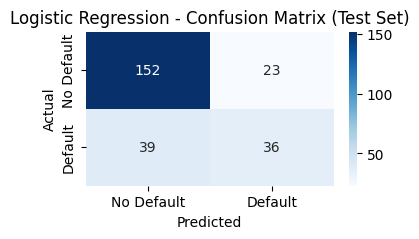

In [8]:
# Predictions on training data
y_pred_train_logreg = logreg.predict(X_train_scaled)

# Performance metrics on training data
print("Logistic Regression - Training Set Performance:")
print(classification_report(y_train, y_pred_train_logreg))
conf_matrix_train_logreg = confusion_matrix(y_train, y_pred_train_logreg)
print("Logistic Regression - Confusion Matrix (Training Set):")
print(conf_matrix_train_logreg)



# Predictions on test data
y_pred_test_logreg = logreg.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nLogistic Regression - Test Set Performance:")
print(classification_report(y_test, y_pred_test_logreg))
conf_matrix_test_logreg = confusion_matrix(y_test, y_pred_test_logreg)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Logistic Regression - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 2: Quadratic Discriminant Analysis

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# QDA directly predicts the class-labels, as opposed to a Logistic Regression where the probabilites (of belonging to a class) are the output.
# Hence in QDA, we cannot set any custom/optimal decision threshold for the probabilities to control the 'precision-recall' performance output.

# Initialize Quadratic Discriminant Analysis and fit the model on the training data
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

QuadraticDiscriminantAnalysis()

Quadratic Discriminant Analysis - Training Set Performance:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       525
           1       0.59      0.32      0.41       225

    accuracy                           0.73       750
   macro avg       0.67      0.61      0.62       750
weighted avg       0.70      0.73      0.70       750

Quadratic Discriminant Analysis - Confusion Matrix (Training Set):
[[475  50]
 [154  71]]



Quadratic Discriminant Analysis - Test Set Performance:
              precision    recall  f1-score   support

           0       0.71      0.85      0.78       175
           1       0.37      0.20      0.26        75

    accuracy                           0.66       250
   macro avg       0.54      0.53      0.52       250
weighted avg       0.61      0.66      0.62       250



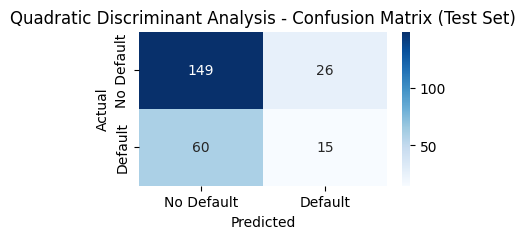

In [10]:
# Make predictions on training data
y_pred_train_qda = qda.predict(X_train_scaled)

# Performance metrics on training data
print("Quadratic Discriminant Analysis - Training Set Performance:")
print(classification_report(y_train, y_pred_train_qda))
conf_matrix_train_qda = confusion_matrix(y_train, y_pred_train_qda)
print("Quadratic Discriminant Analysis - Confusion Matrix (Training Set):")
print(conf_matrix_train_qda)



# Make predictions on test data
y_pred_test_qda = qda.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nQuadratic Discriminant Analysis - Test Set Performance:")
print(classification_report(y_test, y_pred_test_qda))
conf_matrix_test_qda = confusion_matrix(y_test, y_pred_test_qda)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_qda, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Quadratic Discriminant Analysis - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 3: k-Nearest Neighbors (kNN)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
# KNN algorithm also outputs the class-label predictions directly instead of probabilities of belonging to a class.

# Initialize K-Nearest Neighbors
knn = KNeighborsClassifier()

# Hyperparameters tuning with GridSearchCV to find the best value of 'k' which gives highest 'recall' performance
param_grid = {
    'n_neighbors': [1, 2, 3, 5, 7]
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Print the best value of 'k'
print("Best value of 'k':", best_n_neighbors)

# Initialize K-Nearest Neighbors model with the best hyperparameter 'k' value
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Fit the model on the training data
knn_best.fit(X_train_scaled, y_train)

Best value of 'k': 3


KNeighborsClassifier(n_neighbors=3)

K-Nearest Neighbors (with Best 'k') - Training Set Performance:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       525
           1       0.79      0.62      0.69       225

    accuracy                           0.84       750
   macro avg       0.82      0.77      0.79       750
weighted avg       0.83      0.84      0.83       750

K-Nearest Neighbors (with Best 'k') - Confusion Matrix (Training Set):
[[487  38]
 [ 85 140]]



K-Nearest Neighbors (with Best 'k') - Test Set Performance:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       175
           1       0.48      0.40      0.43        75

    accuracy                           0.69       250
   macro avg       0.62      0.61      0.61       250
weighted avg       0.67      0.69      0.68       250



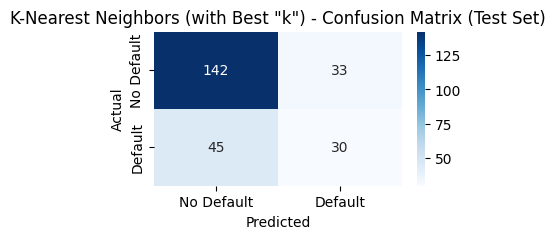

In [12]:
# Make predictions on training data
y_pred_train_knn = knn_best.predict(X_train_scaled)

# Performance metrics on training data
print("K-Nearest Neighbors (with Best 'k') - Training Set Performance:")
print(classification_report(y_train, y_pred_train_knn))
conf_matrix_train_knn = confusion_matrix(y_train, y_pred_train_knn)
print("K-Nearest Neighbors (with Best 'k') - Confusion Matrix (Training Set):")
print(conf_matrix_train_knn)



# Predictions on test data
y_pred_test_knn = knn_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nK-Nearest Neighbors (with Best 'k') - Test Set Performance:")
print(classification_report(y_test, y_pred_test_knn))
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('K-Nearest Neighbors (with Best "k") - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 4: Support Vector Machine (SVM)

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Support Vector Machines model
svm = SVC(random_state=42)

# Finding the best hyperparameters (cross-validation) by choosing the one which outputs the highest 'recall' performance
param_grid = {
    'C': [5, 10, 15, 20],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Fit the grid search on the training data (GridSearchCV) for hyperparameter tuning (with best 'recall' performance value)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters values from grid search
best_params = grid_search.best_params_
best_C = best_params['C']
best_kernel = best_params['kernel']
best_gamma = best_params['gamma']
print("Best hyperparameters (having highest 'recall' performance value during cross-validation on Training data):")
print("C:", best_C)
print("Kernel:", best_kernel)
print("Gamma:", best_gamma)

# Initialize Support Vector Machines model with the best hyperparameters
svm_best = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma, random_state=42)

# Fit the model on the training data
svm_best.fit(X_train_scaled, y_train)

Best hyperparameters (having highest 'recall' performance value during cross-validation on Training data):
C: 10
Kernel: rbf
Gamma: scale


SVC(C=10, random_state=42)

Support Vector Machines (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       525
           1       0.99      0.92      0.95       225

    accuracy                           0.97       750
   macro avg       0.98      0.96      0.97       750
weighted avg       0.97      0.97      0.97       750

Support Vector Machine (with Best Hyperparameters) - Confusion Matrix (Training Set):
[[523   2]
 [ 19 206]]



Support Vector Machines (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       175
           1       0.53      0.44      0.48        75

    accuracy                           0.72       250
   macro avg       0.65      0.64      0.64       250
weighted avg       0.70      0.72      0.71       250



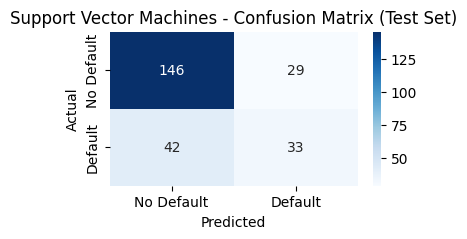

In [14]:
# Make predictions on training data
y_pred_train_svm = svm_best.predict(X_train_scaled)

# Performance metrics on training data
print("Support Vector Machines (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_svm))
conf_matrix_train_svm = confusion_matrix(y_train, y_pred_train_svm)
print("Support Vector Machine (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_svm)



# Make predictions on test data
y_pred_test_svm = svm_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nSupport Vector Machines (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_svm))
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Support Vector Machines - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 5: Random Decision Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV (with 'recall' scoring)
param_grid = {
    'n_estimators': [350, 400, 450],
    'max_depth': [None, 20],
    'min_samples_split': [2, 3, 4]
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("max_depth:", best_max_depth)
print("min_samples_split:", best_min_samples_split)

# Initialize Random Forest model with best hyperparameters
random_forest_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)

# Fit the model on the training data
random_forest_best.fit(X_train_scaled, y_train)

Best hyperparameters:
n_estimators: 350
max_depth: None
min_samples_split: 3


RandomForestClassifier(min_samples_split=3, n_estimators=350, random_state=42)

Random Forest (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       225

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

Random Forest (with Best Hyperparameters) - Confusion Matrix (Training Set):
[[525   0]
 [  0 225]]



Random Forest (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       175
           1       0.63      0.44      0.52        75

    accuracy                           0.76       250
   macro avg       0.71      0.67      0.68       250
weighted avg       0.74      0.76      0.74       250



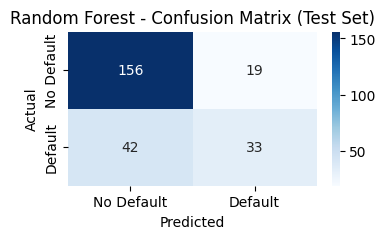

In [16]:
# Predictions on training data
y_pred_train_rf = random_forest_best.predict(X_train_scaled)

# Performance metrics on training data
print("Random Forest (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_rf))
conf_matrix_train_rf = confusion_matrix(y_train, y_pred_train_rf)
print("Random Forest (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_rf)



# Predictions on test data
y_pred_test_rf = random_forest_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nRandom Forest (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_rf))
conf_matrix_test_rf = confusion_matrix(y_test, y_pred_test_rf)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Random Forest - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 6: Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4],
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)
print("max_depth:", best_max_depth)

# Initialize Gradient Boosting model with best hyperparameters
gradient_boosting_best = GradientBoostingClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                                                    max_depth=best_max_depth,
                                                    random_state=42)
# Fit the model on the training data
gradient_boosting_best.fit(X_train_scaled, y_train)

Best hyperparameters:
n_estimators: 50
learning_rate: 0.3
max_depth: 4


GradientBoostingClassifier(learning_rate=0.3, max_depth=4, n_estimators=50,
                           random_state=42)

Gradient Boosting (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       525
           1       1.00      0.96      0.98       225

    accuracy                           0.99       750
   macro avg       0.99      0.98      0.99       750
weighted avg       0.99      0.99      0.99       750

Gradient Boosting (with Best Hyperparameters) - Confusion Matrix (Training Set):
[[525   0]
 [  9 216]]



Gradient Boosting (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       175
           1       0.60      0.52      0.56        75

    accuracy                           0.75       250
   macro avg       0.70      0.69      0.69       250
weighted avg       0.74      0.75      0.75       250



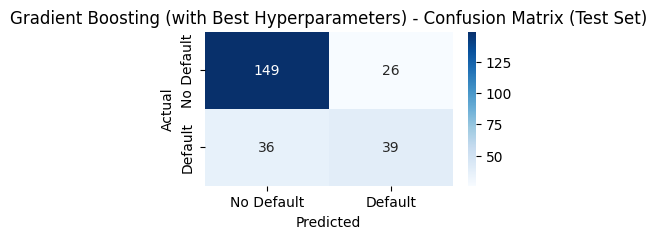

In [18]:
# Predictions on training data
y_pred_train_gb = gradient_boosting_best.predict(X_train_scaled)

# Performance metrics on training data
print("Gradient Boosting (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_gb))
conf_matrix_train_gb = confusion_matrix(y_train, y_pred_train_gb)
print("Gradient Boosting (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_gb)

# Predictions on test data
y_pred_test_gb = gradient_boosting_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nGradient Boosting (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_gb))
conf_matrix_test_gb = confusion_matrix(y_test, y_pred_test_gb)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_gb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Gradient Boosting (with Best Hyperparameters) - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 7: AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [100, 150, 200, 250], 
    'learning_rate': [0.5, 0.6, 0.7, 0.8]
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from the search grid
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)

# Initialize AdaBoost model with best hyperparameters
adaboost_best = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                                   random_state=42)

# Fit the model on the training data
adaboost_best.fit(X_train_scaled, y_train)

Best hyperparameters:
n_estimators: 150
learning_rate: 0.7


AdaBoostClassifier(learning_rate=0.7, n_estimators=150, random_state=42)

AdaBoost (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87       525
           1       0.75      0.58      0.65       225

    accuracy                           0.82       750
   macro avg       0.79      0.75      0.76       750
weighted avg       0.81      0.82      0.81       750




AdaBoost (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       175
           1       0.57      0.47      0.51        75

    accuracy                           0.74       250
   macro avg       0.68      0.66      0.67       250
weighted avg       0.72      0.74      0.73       250



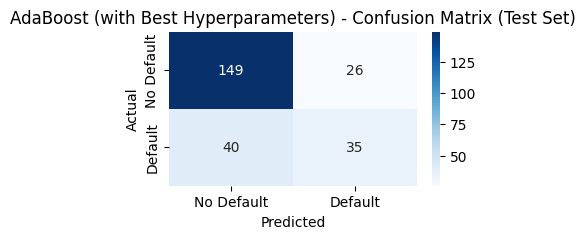

In [25]:
# Predictions on training data
y_pred_train_adaboost = adaboost_best.predict(X_train_scaled)

# Performance metrics on training data
print("AdaBoost (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_adaboost))
conf_matrix_train_adaboost = confusion_matrix(y_train, y_pred_train_adaboost)

# Predictions on test data
y_pred_test_adaboost = adaboost_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nAdaBoost (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_adaboost))
conf_matrix_test_adaboost = confusion_matrix(y_test, y_pred_test_adaboost)

# Confusion matrix for test data
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix_test_adaboost, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('AdaBoost (with Best Hyperparameters) - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 8: XGBoost

In [4]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost model
xgb = XGBClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.3, 0.4, 0.5, 0.6],
    'max_depth': [3, 4, 5, 6]
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)
print("max_depth:", best_max_depth)

# Initialize XGBoost model with best hyperparameters
xgb_best = XGBClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                         max_depth=best_max_depth,
                         random_state=42)

# Fit the model on the training data
xgb_best.fit(X_train_scaled, y_train)

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/lucasrigsby/Desktop/GitHub/German-Bank-Loan-Default-Prediction/.venv/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <6749C431-FD87-3912-A7CF-11CB9194D072> /Users/lucasrigsby/Desktop/GitHub/German-Bank-Loan-Default-Prediction/.venv/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [2]:
# Predictions on training data
y_pred_train_xgb = xgb_best.predict(X_train_scaled)

# Performance metrics on training data
print("XGBoost (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_xgb))
conf_matrix_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)
print("XGBoost (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_xgb)

# Predictions on test data
y_pred_test_xgb = xgb_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nXGBoost (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_xgb))
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('XGBoost (with Best Hyperparameters) - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'xgb_best' is not defined

# AUC-PR for Model Selection